In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [3]:
raw_df = pd.read_csv("cleaned_data.csv")
raw_df.head()

,PlanetIdentifier,AgeGyr,AscendingNodeDeg,Declination,DiscoveryMethod,DiscoveryYear,DistFromSunParsec,Eccentricity,HostStarAgeGyr,HostStarMassSlrMass,...,LongitudeDeg,PeriastronDeg,PeriodDays,PlanetaryMassJpt,RadiusJpt,RightAscension,SemiMajorAxisAU,SurfaceTempK,TypeFlag,HostStar
0,KOI-1843.03,NaN,NaN,+40 13 14.7,transit,2012.0,NaN,NaN,NaN,0.52,...,NaN,NaN,0.176891,0.0014,0.054,19 00 03.14,0.0048,NaN,0,KOI-1843
1,Kepler-974 b,NaN,NaN,+40 13 14.7,transit,NaN,NaN,NaN,NaN,0.52,...,NaN,NaN,4.194497,NaN,0.140,19 00 03.14,0.0390,NaN,0,Kepler-974
2,KOI-1843.02,NaN,NaN,+40 13 14.7,transit,NaN,NaN,NaN,NaN,0.52,...,NaN,NaN,6.356006,NaN,0.071,19 00 03.14,0.0520,NaN,0,KOI-1843
3,Kepler-9 b,NaN,NaN,+38 24 03,transit,2010.0,650.0,0.0626,NaN,1.07,...,NaN,NaN,19.224180,0.2500,0.840,19 02 17,0.1430,707.2,0,Kepler-9
4,Kepler-9 c,NaN,NaN,+38 24 03,transit,2010.0,650.0,0.0684,NaN,1.07,...,NaN,NaN,39.031060,0.1700,0.820,19 02 17,0.2290,557.9,0,Kepler-9


In [4]:
raw_df.columns 
#PlanetaryMassJpt
#RadiusJpt
#HostStarMassSlrMass/SemiMajorAxisAU
#

Index(['PlanetIdentifier', 'AgeGyr', 'AscendingNodeDeg', 'Declination',
       'DiscoveryMethod', 'DiscoveryYear', 'DistFromSunParsec', 'Eccentricity',
       'HostStarAgeGyr', 'HostStarMassSlrMass', 'HostStarMetallicity',
       'HostStarRadiusSlrRad', 'HostStarTempK', 'InclinationDeg',
       'LastUpdated', 'ListsPlanetIsOn', 'LongitudeDeg', 'PeriastronDeg',
       'PeriodDays', 'PlanetaryMassJpt', 'RadiusJpt', 'RightAscension',
       'SemiMajorAxisAU', 'SurfaceTempK', 'TypeFlag', 'HostStar'],
      dtype='object')

In [5]:
raw_df.describe()

,AgeGyr,AscendingNodeDeg,DiscoveryYear,DistFromSunParsec,Eccentricity,HostStarAgeGyr,HostStarMassSlrMass,HostStarMetallicity,HostStarRadiusSlrRad,HostStarTempK,InclinationDeg,LongitudeDeg,PeriastronDeg,PeriodDays,PlanetaryMassJpt,RadiusJpt,SemiMajorAxisAU,SurfaceTempK,TypeFlag
count,2.000000,51.000000,3646.000000,2221.000000,1164.000000,567.000000,3481.000000,2580.000000,3321.000000,3527.000000,699.000000,53.000000,425.000000,3545.000000,1389.000000,2793.000000,1472.000000,688.000000,3657.000000
mean,1.502750,90.590704,2013.364783,549.791794,0.168023,4.705541,0.982498,0.016056,1.510624,5498.963716,83.180022,150.094083,143.555009,532.409261,2.770864,0.373292,1.623735,893.206686,0.101176
std,2.117431,89.759080,6.114967,859.987997,0.189471,4.557523,0.318594,0.194237,3.103234,1204.500800,20.874114,123.883672,122.873871,7419.135936,8.876714,0.418412,8.237817,706.089892,0.430817
min,0.005500,-5.112604,1781.000000,1.295000,0.000000,0.002000,0.012000,-2.090000,0.000014,540.000000,-0.000543,-174.640000,-233.000000,0.090706,0.000008,0.002300,0.004420,102.200000,0.000000
25%,0.754125,1.719000,2013.000000,58.340000,0.020000,2.000000,0.830000,-0.050000,0.810000,5105.000000,85.100000,45.000000,58.900000,4.767040,0.138000,0.141000,0.053200,336.600000,0.000000
50%,1.502750,73.962502,2014.000000,322.000000,0.107500,4.200000,0.976000,0.020000,1.000000,5627.000000,87.800000,163.500000,133.100000,13.214073,0.920000,0.209600,0.176500,756.700000,0.000000
75%,2.251375,154.700000,2016.000000,767.150000,0.249317,6.540000,1.101000,0.110000,1.250000,5940.000000,89.200000,253.000000,240.000000,51.300634,2.500000,0.324000,1.283000,1320.025000,0.000000
max,3.000000,320.800000,2018.000000,8500.000000,0.956000,80.000000,4.500000,0.560000,51.100000,29300.000000,305.000000,339.300000,791.000000,320000.000000,263.000000,6.000000,177.000000,7112.000000,3.000000


### Looking to fill NaN values for RadiusJpt   
using primarily mass and maybe period   
perhaps SemiMajorAxisAU and HostStarMassSlrMass/HostStarRadiusSlrRad would give some insight too

In [6]:
full_size_df = raw_df.dropna(subset = ['RadiusJpt', 'PlanetaryMassJpt'])
print(len(full_size_df))
full_size_df = full_size_df[full_size_df['PlanetaryMassJpt']<10] #filter out the one supermassive planet
full_size_df.head(10)

545


,PlanetIdentifier,AgeGyr,AscendingNodeDeg,Declination,DiscoveryMethod,DiscoveryYear,DistFromSunParsec,Eccentricity,HostStarAgeGyr,HostStarMassSlrMass,...,LongitudeDeg,PeriastronDeg,PeriodDays,PlanetaryMassJpt,RadiusJpt,RightAscension,SemiMajorAxisAU,SurfaceTempK,TypeFlag,HostStar
0,KOI-1843.03,NaN,NaN,+40 13 14.7,transit,2012.0,NaN,NaN,NaN,0.520,...,NaN,NaN,0.176891,0.001400,0.054000,19 00 03.14,0.00480,NaN,0,KOI-1843
3,Kepler-9 b,NaN,NaN,+38 24 03,transit,2010.0,650.00,0.0626,NaN,1.070,...,NaN,NaN,19.224180,0.250000,0.840000,19 02 17,0.14300,707.2,0,Kepler-9
4,Kepler-9 c,NaN,NaN,+38 24 03,transit,2010.0,650.00,0.0684,NaN,1.070,...,NaN,NaN,39.031060,0.170000,0.820000,19 02 17,0.22900,557.9,0,Kepler-9
5,Kepler-9 d,NaN,NaN,+38 24 03,transit,2010.0,650.00,NaN,NaN,1.070,...,NaN,NaN,1.592851,0.022000,0.147000,19 02 17,0.02710,1601.5,0,Kepler-9
8,WASP-124 b,NaN,NaN,-30 44 58.8,transit,2016.0,433.00,NaN,NaN,1.070,...,NaN,NaN,3.372650,0.600000,1.240000,22 10 51.43,0.04490,1400.0,0,WASP-124
13,WASP-82 b,NaN,NaN,+01 53 38,transit,2013.0,200.00,NaN,NaN,1.630,...,NaN,NaN,2.705782,1.240000,1.670000,04 50 39,0.04470,2190.0,0,WASP-82
14,Gliese 1214 b,NaN,NaN,+04 57 49.7,transit,2009.0,14.55,0.0000,NaN,0.176,...,NaN,NaN,1.580404,0.019500,0.252500,17 15 18.94,0.01488,604.0,0,Gliese 1214
15,CoRoT-30 b,NaN,NaN,+06 50 09,transit,2017.0,960.00,0.0070,1.50,0.970,...,NaN,178.1,9.060050,2.840000,1.020000,18 30 24,0.08400,NaN,0,CoRoT-30
30,Kepler-131 b,NaN,NaN,+40 56 32,transit,2014.0,226.30,NaN,3.66,1.020,...,NaN,NaN,16.092000,0.050740,0.219624,19 14 07,NaN,NaN,0,Kepler-131
31,Kepler-131 c,NaN,NaN,+40 56 32,transit,2014.0,226.30,NaN,3.66,1.020,...,NaN,NaN,25.516900,0.025952,0.076549,19 14 07,NaN,NaN,0,Kepler-131


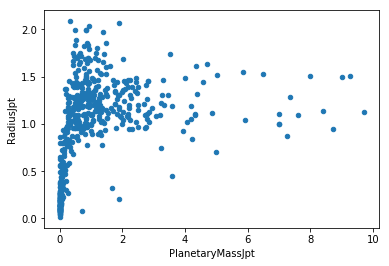

In [7]:
full_size_df.plot(x='PlanetaryMassJpt', y='RadiusJpt', kind = 'scatter')

plt.show()